In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
import scipy

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
import platform

print("Python version:", platform.python_version())
print("Detailed sys.version:", sys.version)
print("Python executable:", sys.executable)


Python version: 3.12.0
Detailed sys.version: 3.12.0 | packaged by Anaconda, Inc. | (main, Oct  2 2023, 17:20:38) [MSC v.1916 64 bit (AMD64)]
Python executable: d:\Data Science\Capstone_Projects\CAPSTONE PROJECT 1\Property Price Prediction\hpp2_env\python.exe


In [4]:
df = pd.read_csv("House Price.csv")
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [5]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:

df.select_dtypes(include=['float64', 'int64']).skew()

UNDER_CONSTRUCTION         1.668090
RERA                       0.782066
BHK_NO.                    2.390076
SQUARE_FT                116.609449
READY_TO_MOVE             -1.668090
RESALE                    -3.358125
LONGITUDE                  0.176655
LATITUDE                 -10.324164
TARGET(PRICE_IN_LACS)     17.583332
dtype: float64

In [7]:
df[df.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


In [8]:
df.select_dtypes(include=['float64', 'int64']).corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


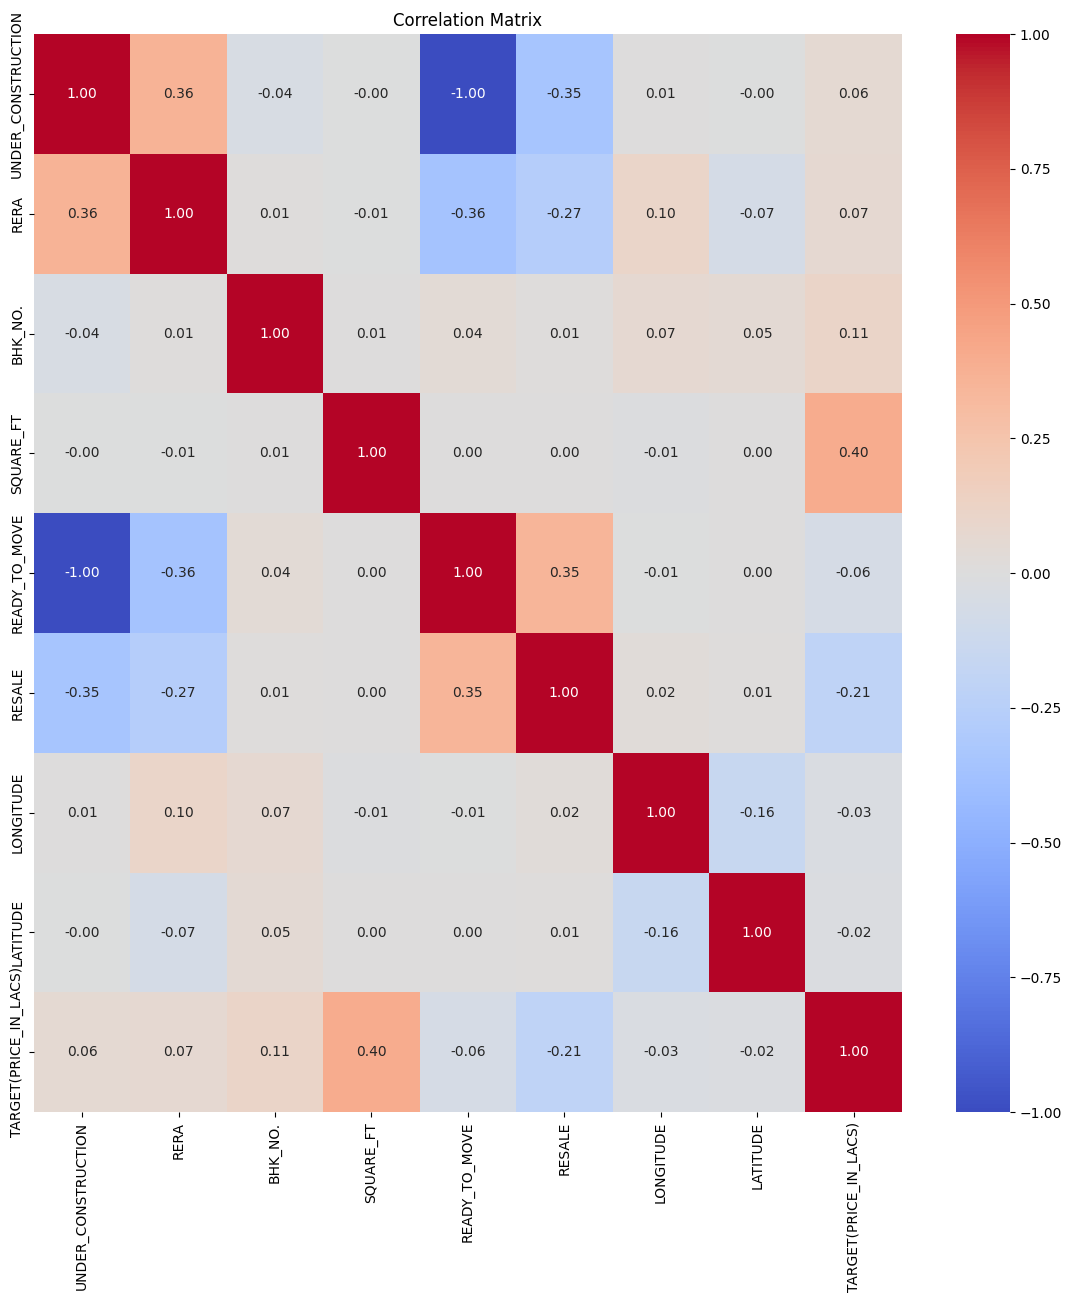

In [9]:
# correlation heat map
plt.figure(figsize=(14,14))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
df["RERA"].unique()

array([0, 1])

In [11]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: POSTED_BY
POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

Column: UNDER_CONSTRUCTION
UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64

Column: RERA
RERA
0    20088
1     9363
Name: count, dtype: int64

Column: BHK_NO.
BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
10        4
20        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64

Column: BHK_OR_RK
BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64

Column: SQUARE_FT
SQUARE_FT
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
3650.240584      1
639.874270       1
1631.818182      1
2843.973718      1
5399.568035      1
Name: count, Length: 19561, dtype: int64

Column: READY_TO_MOVE
READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64

Column: RESALE
RESALE
1    27377
0     2074

In [12]:
df["ADDRESS(City)"] = df['ADDRESS'].str.split(",").str[-1].str.strip()


In [13]:
df.drop(columns  = 'ADDRESS',inplace = True)

In [14]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),ADDRESS(City)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,Chennai


In [15]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [16]:
df[df["BHK_NO."] == 20]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),ADDRESS(City)
3466,Owner,0,0,20,BHK,348.863897,1,1,16.983330,73.300000,15.2,Ratnagiri
20745,Owner,1,0,20,BHK,7000.000000,0,1,13.143000,77.619000,350.0,Bangalore
26200,Dealer,0,0,20,BHK,11983.122360,1,1,24.583330,73.683330,710.0,Udaipur
29187,Owner,0,0,20,BHK,16860.563140,1,1,17.741878,83.308875,2000.0,Visakhapatnam


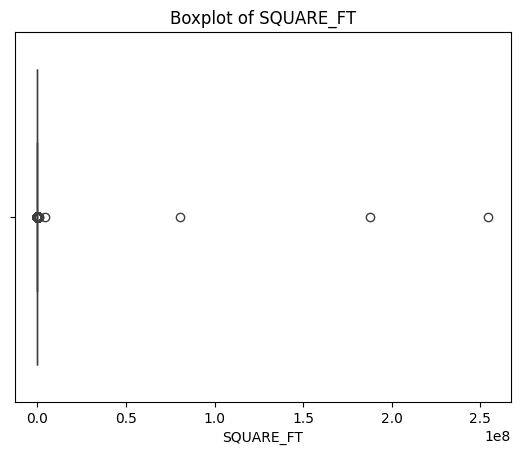

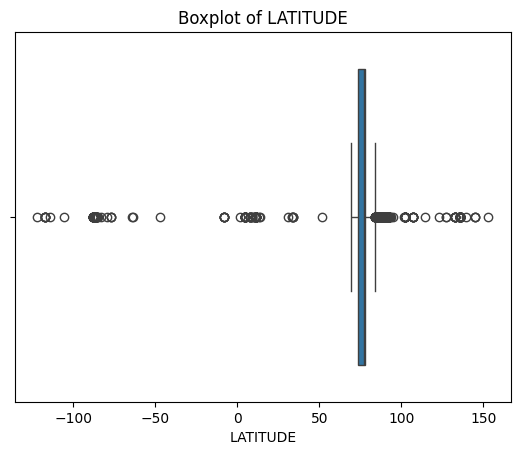

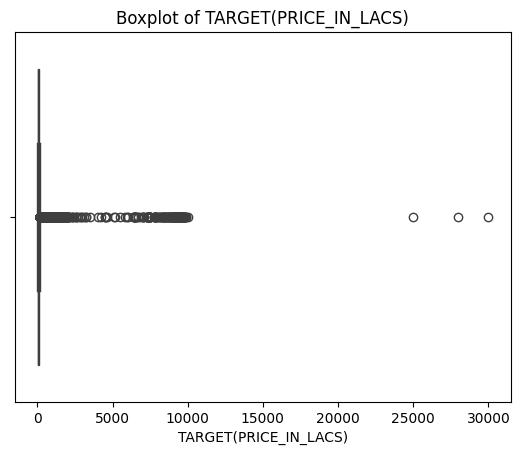

In [17]:
#boxplot

for col in ['SQUARE_FT', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [18]:
df[(df['LATITUDE'] > 90) | (df['LATITUDE'] < -90) ]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),ADDRESS(City)
221,Builder,1,0,2,BHK,898.507463,0,0,26.154874,91.670312,30.1,Guwahati
238,Dealer,0,0,3,BHK,1968.888889,1,1,26.166670,91.766670,88.6,Guwahati
273,Dealer,0,0,1,BHK,497.988891,1,1,26.137220,91.627780,26.0,Guwahati
404,Owner,0,0,2,BHK,1080.246914,1,1,26.157856,91.827348,35.0,Guwahati
568,Dealer,0,0,2,BHK,1400.147384,1,1,35.000000,136.000000,76.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...
28027,Dealer,1,0,3,BHK,1243.076923,0,1,26.154874,91.670312,40.4,Guwahati
28768,Owner,0,0,2,BHK,1210.067764,1,1,35.000000,136.000000,75.0,Bangalore
28900,Owner,0,0,1,BHK,1090.059694,1,1,26.157856,91.827348,42.0,Guwahati
28951,Dealer,0,0,3,BHK,1390.627173,1,1,35.000000,136.000000,100.0,Bangalore


**Latitude must have values between -90 to +90 but the data has greater than this values**

In [19]:
(df[(df['LATITUDE'] > 90) | (df['LATITUDE'] < -90) ].shape[0]/df.shape[0])*100

0.7368170860072663

**The percentage of data errors in this columns are negligible hence we can drop this rows**

In [20]:
# Droping the rows
df = df[(df['LATITUDE'] >= -90) & (df['LATITUDE'] <= 90)]

**Outliers treaatment**

In [21]:
for col in df.select_dtypes(include = 'number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3-q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col}: {len(outliers)} outliers")
  #  print(f"{col}:{(len(outliers)/df.shape[0])*100}")

UNDER_CONSTRUCTION: 5234 outliers
RERA: 0 outliers
BHK_NO.: 284 outliers
SQUARE_FT: 1632 outliers
READY_TO_MOVE: 5234 outliers
RESALE: 2066 outliers
LONGITUDE: 125 outliers
LATITUDE: 2767 outliers
TARGET(PRICE_IN_LACS): 3071 outliers


In [22]:
df['UNDER_CONSTRUCTION'].unique()

array([0, 1])

In [23]:
df['READY_TO_MOVE'].unique()

array([1, 0])

In [24]:
df['RESALE'].unique()

array([1, 0])

**This 3 variables are of binary type so there is no need to treat this outliers**

In [25]:
q1 = df['BHK_NO.'].quantile(0.25)
q3 = df['BHK_NO.'].quantile(0.75)
IQR = q3-q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [26]:
upper_limit

np.float64(4.5)

In [27]:
lower_limit

np.float64(0.5)

In [28]:
df['BHK_NO.'].value_counts().sort_index()

BHK_NO.
1      3564
2     13241
3     10430
4      1715
5       190
6        52
7        11
8        10
9         3
10        4
11        1
12        3
13        1
15        4
17        1
20        4
Name: count, dtype: int64

**In this variable the BHK more than 6 looks suspicious and also the upper limit using the IQR is 4.5 so we are assuming that the 6 BHK are more realistic. So we are dropping this rows**

In [29]:
df = df[df['BHK_NO.'] <= 6]


In [30]:
df['BHK_NO.'].value_counts().sort_index()

BHK_NO.
1     3564
2    13241
3    10430
4     1715
5      190
6       52
Name: count, dtype: int64

In [31]:
numc = ["SQUARE_FT",'TARGET(PRICE_IN_LACS)']
for i in numc:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_limit) | (df[i] > upper_limit)]
    
    df[i] = df[i].clip(lower_limit, upper_limit)

In [32]:
lower_limit

np.float64(-55.0)

In [33]:
upper_limit

np.float64(193.0)

In [34]:
df['TARGET(PRICE_IN_LACS)'].max()

np.float64(193.0)

In [35]:
df.select_dtypes(include=['float64', 'int64']).skew()

UNDER_CONSTRUCTION        1.673378
RERA                      0.770508
BHK_NO.                   0.360144
SQUARE_FT                 0.737613
READY_TO_MOVE            -1.673378
RESALE                   -3.347691
LONGITUDE                 0.260180
LATITUDE                -12.420988
TARGET(PRICE_IN_LACS)     0.959897
dtype: float64

**Skewness treatment**

In [36]:
df['SQUARE_FT'] = np.sqrt(df['SQUARE_FT'])

In [37]:
df['TARGET(PRICE_IN_LACS)'] = np.log1p(df['TARGET(PRICE_IN_LACS)'])


In [38]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
ADDRESS(City)             object
dtype: object

In [39]:
df["ADDRESS(City)"].nunique()

246

In [40]:

for col in df.select_dtypes(include = 'number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3-q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col}: {len(outliers)} outliers")
    print(f"{col}:{(len(outliers)/df.shape[0])*100}")

UNDER_CONSTRUCTION: 5230 outliers
UNDER_CONSTRUCTION:17.9158673609208
RERA: 0 outliers
RERA:0.0
BHK_NO.: 242 outliers
BHK_NO.:0.8289942449986298
SQUARE_FT: 67 outliers
SQUARE_FT:0.2295149355987942
READY_TO_MOVE: 5230 outliers
READY_TO_MOVE:17.9158673609208
RESALE: 2066 outliers
RESALE:7.077281446971773
LONGITUDE: 125 outliers
LONGITUDE:0.4281995067141683
LATITUDE: 2777 outliers
LATITUDE:9.512880241161962
TARGET(PRICE_IN_LACS): 86 outliers
TARGET(PRICE_IN_LACS):0.29460126061934777


In [41]:
df['ADDRESS(City)'].value_counts()

ADDRESS(City)
Bangalore    4242
Lalitpur     2990
Mumbai       2020
Pune         1989
Noida        1766
             ... 
Vellore         1
Bharatpur       1
Bhuj            1
Siwan           1
Washim          1
Name: count, Length: 246, dtype: int64

In [42]:
city_counts = df['ADDRESS(City)'].value_counts()

# Filter cities that occur less than 5 times
rare_cities = city_counts[city_counts < 5].index
rare_cities

Index(['Dhule', 'Hosur', 'Nadiad', 'Godhra', 'Kharagpur', 'Nanded', 'Ambala',
       'Thanjavur', 'Warangal', 'Bhagalpur',
       ...
       'Rajnandgaon', 'Cuddalore', 'Raichur', 'Sambalpur', 'Gondia', 'Vellore',
       'Bharatpur', 'Bhuj', 'Siwan', 'Washim'],
      dtype='object', name='ADDRESS(City)', length=102)

In [43]:
df['ADDRESS(City)'] = df['ADDRESS(City)'].replace(rare_cities, 'Other')


In [44]:
df['ADDRESS(City)'].nunique()

145

**`Encoding categorical columns`**

In [45]:
df_n = df.copy()

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_n['Address(city)_encoded'] = le.fit_transform(df_n['ADDRESS(City)'])


In [47]:
pd.DataFrame({"classes":le.classes_,"Frec":df_n['Address(city)_encoded'].unique()})

,classes,Frec
0,Agra,14
1,Ahmednagar,94
2,Ajmer,45
3,Akola,75
4,Aligarh,73
...,...,...
140,Varanasi,119
141,Vijayawada,16
142,Visakhapatnam,47
143,Vizianagaram,60


In [48]:
le2 = LabelEncoder()
df_n['Posted_by_encoded'] = le2.fit_transform(df_n['POSTED_BY'])

In [49]:
pd.DataFrame({"classes":le2.classes_,"Frec":df_n['Posted_by_encoded'].unique()})

,classes,Frec
0,Builder,2
1,Dealer,1
2,Owner,0


In [50]:
df["BHK_OR_RK"].unique()

array(['BHK', 'RK'], dtype=object)

In [51]:
df_n.drop(columns = "ADDRESS(City)",inplace = True)

In [52]:
df_n.drop(columns = "POSTED_BY",inplace = True)

In [53]:
df_n = pd.get_dummies(df_n, columns=['BHK_OR_RK'], drop_first=True)


In [54]:
df_n = df_n.rename(columns = {"BHK_OR_RK_RK":"BHK_or_RK"},inplace = False)

In [55]:
df_n['BHK_or_RK'].value_counts()

BHK_or_RK
False    29168
True        24
Name: count, dtype: int64

**Splitting the dataset in X and y**

In [56]:
X = df_n.drop(columns = "TARGET(PRICE_IN_LACS)",axis = 1)
y = df_n["TARGET(PRICE_IN_LACS)"]

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [58]:
df_n

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Address(city)_encoded,Posted_by_encoded,BHK_or_RK
0,0,0,2,36.058791,1,1,12.969910,77.597960,4.025352,14,2,False
1,0,0,2,35.707142,1,1,12.274538,76.644605,3.951244,94,1,False
2,0,0,2,30.547663,1,1,12.778033,77.632191,3.784190,14,2,False
3,0,1,2,30.494608,1,1,28.642300,77.344500,4.151040,45,2,False
4,1,0,2,31.607108,0,1,22.592200,88.484911,4.119037,75,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,50.000000,1,1,27.140626,78.043277,3.828641,0,2,False
29447,0,0,2,27.735010,1,1,39.945409,-86.150721,2.833213,139,2,False
29448,0,0,2,31.978767,1,1,26.928785,75.828002,3.335770,57,1,False
29449,0,0,2,30.447972,1,1,12.900150,80.227910,4.219508,30,2,False


- **Model Performance metrics Function**

In [59]:
def evaluate_corrected(y_test, y_pred, model_name, X_train, Y_train):
   
    
    mse = (mean_squared_error(y_test, y_pred))
    rmse = round(np.sqrt(mse),4)
    r2 = round(r2_score(y_test, y_pred),4)
    
    
    #  EVALUATION FOR THE TRAINING SET
    
    
    y_train_pred_log = model_name.predict(X_train) # Prediction is on LOG scale
    
    # Inverse transform both true and predicted values back to the original price scale
    y_train_true_price = np.expm1(Y_train)
    y_train_pred_price = np.expm1(y_train_pred_log)
    
    # Calculate metrics on the original price scale
    mse_train = mean_squared_error(y_train_true_price, y_train_pred_price)
    rmse_train = round(np.sqrt(mse_train),4)
    r2_train = round(r2_score(y_train_true_price, y_train_pred_price),4)

    
    #  OVERFITTING CONDITION
        
    overfit = 'Y' if abs(r2_train - r2) > 0.05 else 'N'
    
    return rmse_train, rmse, r2_train, r2, overfit

<span style="font-size:18px; font-weight:bold;">**`Linear Regression`**<span>

In [60]:
# Linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


y_pred_lrt = np.expm1(y_pred_lr)
y_val_true = np.expm1(y_test)

train_rmse_lr, test_rmse_lr, train_r2_lr, test_r2_lr, overfit_lr = evaluate_corrected(y_val_true, y_pred_lrt, lr, X_train, y_train) 

print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}") 
print(f"Train R2: {train_r2_lr}")   
print(f"Test R2: {test_r2_lr}")      
print(f"Overfitting: {overfit_lr}")

Train RMSE: 41.9105
Test RMSE: 41.1313
Train R2: 0.4099
Test R2: 0.4323
Overfitting: N


<span style="font-size:18px; font-weight:bold;">**`Random Forest`**<span>

In [61]:
# 1
# Random Forest 

rf = RandomForestRegressor(n_estimators=200, random_state=42,  max_depth=10) 

rf.fit(X_train, y_train)


y_pred_rf_log = rf.predict(X_test)

y_pred_rf = np.expm1(y_pred_rf_log)
y_test_true = np.expm1(y_test)

train_rmse_rf, test_rmse_rf, train_r2_rf, test_r2_rf, overfit_rf = evaluate_corrected(
    y_test_true, y_pred_rf, rf, X_train, y_train)

print(f"Random Forest - Train RMSE: {train_rmse_rf}")
print(f"Random Forest - Test RMSE: {test_rmse_rf}")
print(f"Random Forest - Train R2: {train_r2_rf}")
print(f"Random Forest - Test R2: {test_r2_rf}")
print(f"Random Forest - Overfitting: {overfit_rf}")

Random Forest - Train RMSE: 21.5151
Random Forest - Test RMSE: 24.2003
Random Forest - Train R2: 0.8445
Random Forest - Test R2: 0.8035
Random Forest - Overfitting: N


<span style="font-size:18px; font-weight:bold;">**`Decision Tree`**<span>

In [62]:
# ww Decision Tree
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt_log = dt.predict(X_test)

y_pred_dt = np.expm1(y_pred_dt_log)
y_val_true = np.expm1(y_test)

train_rmse_dt, test_rmse_dt, train_r2_dt, test_r2_dt, overfit_dt = evaluate_corrected(y_val_true, y_pred_dt, dt, X_train, y_train)

print(f"Decision Tree - Train RMSE: {train_rmse_dt}")
print(f"Decision Tree - Test RMSE: {test_rmse_dt}")
print(f"Decision Tree - Train R2: {train_r2_dt}")
print(f"Decision Tree - Test R2: {test_r2_dt}")
print(f"Decision Tree - Overfitting: {overfit_dt}")

Decision Tree - Train RMSE: 32.0985
Decision Tree - Test RMSE: 32.2682
Decision Tree - Train R2: 0.6538
Decision Tree - Test R2: 0.6506
Decision Tree - Overfitting: N


<span style="font-size:18px; font-weight:bold;">**`Gradient Boosting`**<span>

In [63]:
# ww Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42,max_depth= 2, learning_rate = 0.05)
gb.fit(X_train, y_train)
y_pred_gb_log = gb.predict(X_test)

y_pred_gb = np.expm1(y_pred_gb_log)
y_val_true = np.expm1(y_test)

train_rmse_gb, test_rmse_gb, train_r2_gb, test_r2_gb, overfit_gb = evaluate_corrected(y_val_true, y_pred_gb, gb, X_train, y_train)

print(f"Gradient Boosting - Train RMSE: {train_rmse_gb}")
print(f"Gradient Boosting - Test RMSE: {test_rmse_gb}")
print(f"Gradient Boosting - Train R2: {train_r2_gb}")
print(f"Gradient Boosting - Test R2: {test_r2_gb}")
print(f"Gradient Boosting - Overfitting: {overfit_gb}")

Gradient Boosting - Train RMSE: 30.8198
Gradient Boosting - Test RMSE: 30.507
Gradient Boosting - Train R2: 0.6809
Gradient Boosting - Test R2: 0.6877
Gradient Boosting - Overfitting: N


<span style="font-size:18px; font-weight:bold;">**`XGBoost`**<span>

In [64]:
# ww Xgboost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05,max_depth= 2, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb_log = xgb.predict(X_test)

y_pred_xgb = np.expm1(y_pred_xgb_log)
y_val_true = np.expm1(y_test)

train_rmse_xgb, test_rmse_xgb, train_r2_xgb, test_r2_xgb, overfit_xgb = evaluate_corrected(y_val_true, y_pred_xgb, xgb, X_train, y_train)

print(f"Xgboost - Train RMSE: {train_rmse_xgb}")
print(f"Xgboost  - Test RMSE: {test_rmse_xgb}")
print(f"Xgboost - Train R2: {train_r2_xgb}")
print(f"Xgboost - Test R2: {test_r2_xgb}")
print(f"Xgboost - Overfitting: {overfit_xgb}")

Xgboost - Train RMSE: 30.8604
Xgboost  - Test RMSE: 30.5211
Xgboost - Train R2: 0.68
Xgboost - Test R2: 0.6874
Xgboost - Overfitting: N


<span style="font-size:18px; font-weight:bold;">**`CatBoost`**<span>

In [65]:
# 1
# catboost

cat_model = CatBoostRegressor(
    iterations=500,         
    learning_rate=0.05,
    depth=3,
    random_seed=42,
    verbose=100,             
    early_stopping_rounds=50
)


cat_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)


y_pred_cat_log = cat_model.predict(X_test)


y_pred_cat = np.expm1(y_pred_cat_log)
y_val_true = np.expm1(y_test)

train_rmse, test_rmse, train_r2, test_r2, overfit = evaluate_corrected(
    y_val_true, y_pred_cat, cat_model, X_train, y_train
)

print(f"CatBoost - Train RMSE: {train_rmse}")
print(f"CatBoost - Test RMSE: {test_rmse}")
print(f"CatBoost - Train R2: {train_r2}")
print(f"CatBoost - Test R2: {test_r2}")
print(f"CatBoost - Overfitting: {overfit}")


0:	learn: 0.6845114	test: 0.6873067	best: 0.6873067 (0)	total: 155ms	remaining: 1m 17s
100:	learn: 0.3836109	test: 0.3813495	best: 0.3813495 (100)	total: 424ms	remaining: 1.67s
200:	learn: 0.3584644	test: 0.3577515	best: 0.3577515 (200)	total: 987ms	remaining: 1.47s
300:	learn: 0.3450748	test: 0.3452272	best: 0.3452272 (300)	total: 1.39s	remaining: 919ms
400:	learn: 0.3360758	test: 0.3367546	best: 0.3367546 (400)	total: 1.69s	remaining: 418ms
499:	learn: 0.3289014	test: 0.3301139	best: 0.3301139 (499)	total: 1.96s	remaining: 0us

bestTest = 0.3301138953
bestIteration = 499

CatBoost - Train RMSE: 26.8115
CatBoost - Test RMSE: 26.5604
CatBoost - Train R2: 0.7585
CatBoost - Test R2: 0.7633
CatBoost - Overfitting: N


In [66]:
# 2 
# catboost

cat_model = CatBoostRegressor(loss_function='RMSE',
    iterations=500,        
    learning_rate=0.02,
    depth=10,
    random_seed=42,
    l2_leaf_reg= 1,
    verbose=100,             
    early_stopping_rounds=50
)


cat_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)


y_pred_cat_log = cat_model.predict(X_test)


y_pred_cat = np.expm1(y_pred_cat_log)
y_val_true = np.expm1(y_test)

train_rmse, test_rmse, train_r2, test_r2, overfit = evaluate_corrected(
    y_val_true, y_pred_cat, cat_model, X_train, y_train
)

print(f"CatBoost - Train RMSE: {train_rmse}")
print(f"CatBoost - Test RMSE: {test_rmse}")
print(f"CatBoost - Train R2: {train_r2}")
print(f"CatBoost - Test R2: {test_r2}")
print(f"CatBoost - Overfitting: {overfit}")


0:	learn: 0.6905549	test: 0.6932293	best: 0.6932293 (0)	total: 33.5ms	remaining: 16.7s
100:	learn: 0.3576344	test: 0.3604680	best: 0.3604680 (100)	total: 2.97s	remaining: 11.7s
200:	learn: 0.3171860	test: 0.3258712	best: 0.3258712 (200)	total: 6.15s	remaining: 9.14s
300:	learn: 0.3011683	test: 0.3144073	best: 0.3144073 (300)	total: 9.18s	remaining: 6.07s
400:	learn: 0.2903343	test: 0.3070940	best: 0.3070940 (400)	total: 12.1s	remaining: 3s
499:	learn: 0.2811895	test: 0.3008616	best: 0.3008616 (499)	total: 15.2s	remaining: 0us

bestTest = 0.3008615507
bestIteration = 499

CatBoost - Train RMSE: 22.7244
CatBoost - Test RMSE: 23.635
CatBoost - Train R2: 0.8265
CatBoost - Test R2: 0.8125
CatBoost - Overfitting: N


In [67]:
#3
# Catboost
cat_model_3 = CatBoostRegressor(loss_function='RMSE',
     iterations=1000,
    learning_rate=0.02,
    depth=6,                   
    l2_leaf_reg=10,            
    subsample=0.8,           
    rsm=0.8,                   
    random_strength=10,          
    random_seed=42,
    verbose=100,
    early_stopping_rounds=70
)


cat_model_3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)


y_pred_cat_log = cat_model_3.predict(X_test)


y_pred_cat = np.expm1(y_pred_cat_log)
y_val_true = np.expm1(y_test)

train_rmse, test_rmse, train_r2, test_r2, overfit = evaluate_corrected(
    y_val_true, y_pred_cat, cat_model_3, X_train, y_train
)

print(f"CatBoost - Train RMSE: {train_rmse}")
print(f"CatBoost - Test RMSE: {test_rmse}")
print(f"CatBoost - Train R2: {train_r2}")
print(f"CatBoost - Test R2: {test_r2}")
print(f"CatBoost - Overfitting: {overfit}")

0:	learn: 0.6924217	test: 0.6951186	best: 0.6951186 (0)	total: 4.84ms	remaining: 4.84s
100:	learn: 0.4280418	test: 0.4267530	best: 0.4267530 (100)	total: 796ms	remaining: 7.08s
200:	learn: 0.3841447	test: 0.3819080	best: 0.3819080 (200)	total: 1.28s	remaining: 5.09s
300:	learn: 0.3693173	test: 0.3673928	best: 0.3673928 (300)	total: 1.88s	remaining: 4.38s
400:	learn: 0.3597578	test: 0.3584199	best: 0.3584199 (400)	total: 2.48s	remaining: 3.71s
500:	learn: 0.3523667	test: 0.3517437	best: 0.3517437 (500)	total: 3.1s	remaining: 3.09s
600:	learn: 0.3416272	test: 0.3422618	best: 0.3422618 (600)	total: 3.74s	remaining: 2.48s
700:	learn: 0.3307782	test: 0.3329447	best: 0.3329447 (700)	total: 4.42s	remaining: 1.88s
800:	learn: 0.3221181	test: 0.3251962	best: 0.3251962 (800)	total: 4.96s	remaining: 1.23s
900:	learn: 0.3153947	test: 0.3193952	best: 0.3193952 (900)	total: 5.89s	remaining: 647ms
999:	learn: 0.3101486	test: 0.3147285	best: 0.3147285 (999)	total: 6.53s	remaining: 0us

bestTest = 0.31

<span style="font-size:18px; font-weight:bold;">**`LightGBM Regressor`**<span>

In [68]:
from lightgbm import LGBMRegressor


lgbm = LGBMRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=-1,         
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,num_leaves= 127,
    n_jobs=-1            
)


lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse'
)


y_pred_lgb_log = lgbm.predict(X_test)

y_pred_lgb = np.expm1(y_pred_lgb_log)
y_val_true = np.expm1(y_test)


train_rmse, test_rmse, train_r2, test_r2, overfit = evaluate_corrected(
    y_val_true, y_pred_lgb, lgbm, X_train, y_train
)

print(f"LightGBM - Train RMSE: {train_rmse}")
print(f"LightGBM - Test RMSE: {test_rmse}")
print(f"LightGBM - Train R2: {train_r2}")
print(f"LightGBM - Test R2: {test_r2}")
print(f"LightGBM - Overfitting: {overfit}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 21894, number of used features: 11
[LightGBM] [Info] Start training from score 4.155027
LightGBM - Train RMSE: 14.1198
LightGBM - Test RMSE: 20.9433
LightGBM - Train R2: 0.933
LightGBM - Test R2: 0.8528
LightGBM - Overfitting: Y


<span style="font-size:20px; font-weight:bold;">- `VOTING ENSEMBLE`</span>


In [69]:
# Voting Ensemble for Regression

cat = CatBoostRegressor(
    loss_function='RMSE',
     iterations=1000,
    learning_rate=0.02,
    depth=6,                   
    l2_leaf_reg=10,            
    subsample=0.8,           
    rsm=0.8,                   
    random_strength=10,          
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

lgb = LGBMRegressor(
      n_estimators=800,
    learning_rate=0.05,
    max_depth=-1,         
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,num_leaves= 127,
    n_jobs=-1
)

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42,
    n_jobs=-1
)


voting_model = VotingRegressor(
    estimators=[
        ('cat', cat),
        ('lgb', lgb),
        ('rf', rf)
    ],
    n_jobs=-1
)


voting_model.fit(X_train, y_train)

y_pred_log = voting_model.predict(X_test)

# Convert back to original scale
y_pred_vot = np.expm1(y_pred_log)
y_val_true = np.expm1(y_test)


# Evaluate
train_rmse_vt1, test_rmse_vt1, train_r2_vt1, test_r2_vt1, overfit_vt1 = evaluate_corrected(
    y_val_true, y_pred_vot, voting_model, X_train, y_train
)

print(f" Voting Ensemble - Train RMSE: {train_rmse_vt1}")
print(f"Voting Ensemble - Test RMSE: {test_rmse_vt1}")
print(f"Voting Ensemble - Train R2: {train_r2_vt1}")
print(f"Voting Ensemble - Test R2: {test_r2_vt1}")
print(f"Voting Ensemble - Overfitting: {overfit_vt1}")

 Voting Ensemble - Train RMSE: 20.4689
Voting Ensemble - Test RMSE: 22.9639
Voting Ensemble - Train R2: 0.8592
Voting Ensemble - Test R2: 0.823
Voting Ensemble - Overfitting: N


- **Hyper-prameter tuning each model in voting ensemble to increase the model's accuracy**

# Random forest (search cv)
rf = RandomForestRegressor(random_state=42)


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 8, 10, 12, 15, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,               
    scoring='r2',            
    cv=5,                 
    verbose=2,               
    random_state=42,
    n_jobs=-1  )              

rf_random_search.fit(X_train, y_train)

print("Best Parameters:", rf_random_search.best_params_)
print("Best CV R2 Score:", rf_random_search.best_score_)

In [70]:
# Random Forest 

rf = RandomForestRegressor(n_estimators=500,min_samples_split = 5, min_samples_leaf = 2, max_features= 'sqrt', random_state=42, bootstrap= False, max_depth=None) 

rf.fit(X_train, y_train)


y_pred_rf_log = rf.predict(X_test)

y_pred_rf = np.expm1(y_pred_rf_log)
y_test_true = np.expm1(y_test)

train_rmse, test_rmse, train_r2, test_r2, overfit = evaluate_corrected(
    y_test_true, y_pred_rf, rf, X_train, y_train)

print(f"Random Forest - Train RMSE: {train_rmse}")
print(f"Random Forest - Test RMSE: {test_rmse}")
print(f"Random Forest - Train R2: {train_r2}")
print(f"Random Forest - Test R2: {test_r2}")
print(f"Random Forest - Overfitting: {overfit}")

Random Forest - Train RMSE: 12.6847
Random Forest - Test RMSE: 22.1822
Random Forest - Train R2: 0.9459
Random Forest - Test R2: 0.8349
Random Forest - Overfitting: Y


# --- CatBoost (search cv)
cat = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=0)

cat_param_dist = {
    'iterations': [500, 800, 1000, 1200],
    'learning_rate': [0.01, 0.02, 0.03, 0.05],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [3, 5, 10, 15],
    'subsample': [0.6, 0.8, 1.0],
    'rsm': [0.6, 0.8, 1.0]
}

cat_random = RandomizedSearchCV(
    estimator=cat,
    param_distributions=cat_param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
cat_random.fit(X_train, y_train)
print("Best CatBoost Params:", cat_random.best_params_)


In [71]:
# Catboost
cat_model_3 = CatBoostRegressor(loss_function='RMSE',
     iterations=1400,
    learning_rate=0.05,
    depth=8,                   
    l2_leaf_reg=12,            
    subsample=1.0,           
    rsm=0.6,                   
    random_strength=10,          
    random_seed=42,
    verbose=0,
    early_stopping_rounds=100
)


cat_model_3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)


y_pred_cat_log = cat_model_3.predict(X_test)


y_pred_cat = np.expm1(y_pred_cat_log)
y_val_true = np.expm1(y_test)

train_rmse_ctb, test_rmse_ctb, train_r2_ctb, test_r2_ctb, overfit_ctb = evaluate_corrected(
    y_val_true, y_pred_cat, cat_model_3, X_train, y_train
)

print(f"CatBoost - Train RMSE: {train_rmse_ctb}")
print(f"CatBoost - Test RMSE: {test_rmse_ctb}")
print(f"CatBoost - Train R2: {train_r2_ctb}")
print(f"CatBoost - Test R2: {test_r2_ctb}")
print(f"CatBoost - Overfitting: {overfit_ctb}")

CatBoost - Train RMSE: 20.0855
CatBoost - Test RMSE: 21.7579
CatBoost - Train R2: 0.8645
CatBoost - Test R2: 0.8411
CatBoost - Overfitting: N


# --- LightGBM (search cv)
lgb = LGBMRegressor(random_state=42)

lgb_param_dist = {
    'n_estimators': [500, 800, 1000, 1200],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'num_leaves': [31, 63, 127, 255],
    'max_depth': [-1, 10, 15, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_samples': [10, 20, 30]
}

lgb_random = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=lgb_param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
lgb_random.fit(X_train, y_train)
print("Best LightGBM Params:", lgb_random.best_params_)


- **The parameters from randomized search cv was not performing good, so with multiple try and error got this set of hyper-parameters**

# Best

In [72]:
lgbm_B = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.04,
    max_depth=6,         
    subsample=0.5,
    colsample_bytree=0.6,
    random_state=42,
    num_leaves= 140,
    min_child_samples= 1,
    n_jobs=-1            
)


lgbm_B.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse'
)


y_pred_lgb_log = lgbm_B.predict(X_test)

y_pred_lgb_l = np.expm1(y_pred_lgb_log)
y_val_true_l = np.expm1(y_test)


train_rmse_ltb, test_rmse_ltb, train_r2_ltb, test_r2_ltb, overfit_ltb = evaluate_corrected(
    y_val_true_l, y_pred_lgb_l, lgbm_B, X_train, y_train
)

print(f"LightGBM - Train RMSE: {train_rmse_ltb}")
print(f"LightGBM - Test RMSE: {test_rmse_ltb}")
print(f"LightGBM - Train R2: {train_r2_ltb}")
print(f"LightGBM - Test R2: {test_r2_ltb}")
print(f"LightGBM - Overfitting: {overfit_ltb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 21894, number of used features: 11
[LightGBM] [Info] Start training from score 4.155027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

- **voting ensemble with tuned parameters**

In [73]:
# Voting Ensemble for Regression ----(2)
from sklearn.ensemble import VotingRegressor


cat = CatBoostRegressor(
    loss_function='RMSE',
    iterations=1400,
    learning_rate=0.05,
    depth=8,                   
    l2_leaf_reg=12,            
    subsample=1.0,           
    rsm=0.6,                   
    random_strength=10,          
    random_seed=42,
    verbose=0,
    early_stopping_rounds=100
)

lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.04,
    max_depth=6,         
    subsample=0.5,
    colsample_bytree=0.6,
    random_state=42,
    num_leaves= 140,
    min_child_samples= 1,
    n_jobs=-1 
)

rf = RandomForestRegressor(
n_estimators=200, random_state=42,  max_depth=10,
    n_jobs=-1
)


voting_model = VotingRegressor(
    estimators=[
        ('cat', cat),
        ('lgb', lgb),
        ('rf', rf)
    ],
    n_jobs=-1
)


voting_model.fit(X_train, y_train)

y_pred_log = voting_model.predict(X_test)

# Convert back to original scale
y_pred_vot = np.expm1(y_pred_log)
y_val_true = np.expm1(y_test)


# Evaluate
train_rmse_vt2, test_rmse_vt2, train_r2_vt2, test_r2_vt2, overfit_vt2 = evaluate_corrected(
    y_val_true, y_pred_vot, voting_model, X_train, y_train
)

print(f" Voting Ensemble - Train RMSE: {train_rmse_vt2}")
print(f"Voting Ensemble - Test RMSE: {test_rmse_vt2}")
print(f"Voting Ensemble - Train R2: {train_r2_vt2}")
print(f"Voting Ensemble - Test R2: {test_r2_vt2}")
print(f"Voting Ensemble - Overfitting: {overfit_vt2}")

 Voting Ensemble - Train RMSE: 19.1341
Voting Ensemble - Test RMSE: 21.7175
Voting Ensemble - Train R2: 0.877
Voting Ensemble - Test R2: 0.8417
Voting Ensemble - Overfitting: N


In [74]:
Models = ["Linear Regression",
         "Decision Tree",
         "Random Forest","Gradient Boosting",
         "XGBoosting","CatBoost","LightGBM","Voting Ensemble_1","Voting Ensemble_2"]

In [75]:
train_rmse = [train_rmse_lr,train_rmse_dt,train_rmse_rf,train_rmse_gb,train_rmse_xgb,train_rmse_ctb,train_rmse_ltb,train_rmse_vt1,train_rmse_vt2]

In [76]:
test_rmse = [test_rmse_lr,test_rmse_dt,test_rmse_rf,test_rmse_gb,test_rmse_xgb,test_rmse_ctb,test_rmse_ltb,test_rmse_vt1,test_rmse_vt2]

In [77]:
train_r2 = [train_r2_lr,train_r2_dt,train_r2_rf,train_r2_gb,train_r2_xgb,train_r2_ctb,train_r2_ltb,train_r2_vt1,train_r2_vt2]

In [78]:
test_r2 = [test_r2_lr,test_r2_dt,test_r2_rf,test_r2_gb,test_r2_xgb,test_r2_ctb,test_r2_ltb,test_r2_vt1,test_r2_vt2]

In [79]:
overfitting = [overfit_lr,overfit_dt,overfit_rf,overfit_gb,overfit_xgb,overfit_ctb,overfit_ltb,overfit_vt1,overfit_vt2]

In [80]:
b = ["_","_","_","_","_","_","Best Model","_","_" ]

In [81]:
df_models = pd.DataFrame({"Algorithms":Models,
                         "Train RMSE":train_rmse,
                         "Test RMSE":test_rmse,
                         "Train R2":train_r2,
                         "Test R2":test_r2,
                         "Overfitting":overfitting,
                         "Best":b})
df_models

,Algorithms,Train RMSE,Test RMSE,Train R2,Test R2,Overfitting,Best
0,Linear Regression,41.9105,41.1313,0.4099,0.4323,N,_
1,Decision Tree,32.0985,32.2682,0.6538,0.6506,N,_
2,Random Forest,21.5151,24.2003,0.8445,0.8035,N,_
3,Gradient Boosting,30.8198,30.5070,0.6809,0.6877,N,_
4,XGBoosting,30.8604,30.5211,0.6800,0.6874,N,_
5,CatBoost,20.0855,21.7579,0.8645,0.8411,N,_
6,LightGBM,17.3847,21.0565,0.8985,0.8512,N,Best Model
7,Voting Ensemble_1,20.4689,22.9639,0.8592,0.8230,N,_
8,Voting Ensemble_2,19.1341,21.7175,0.8770,0.8417,N,_


**`From this table it is clear that lightGBM is the best performing model.It has Lowest Test RMSE (21.05) → best predictive accuracy.
Highest Test R² (0.8513) → explains ~85% of variance in target and No overfitting (Train/Test gap is small).`**

In [82]:
import pandas as pd

# Get feature importance and feature names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_B.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 20 most important features
importance_df


,Feature,Importance
3,SQUARE_FT,13627
6,LONGITUDE,11037
7,LATITUDE,10843
8,Address(city)_encoded,7607
2,BHK_NO.,4486
9,Posted_by_encoded,2057
1,RERA,1869
0,UNDER_CONSTRUCTION,1768
5,RESALE,954
4,READY_TO_MOVE,869


**`Feature Importance Plot`**

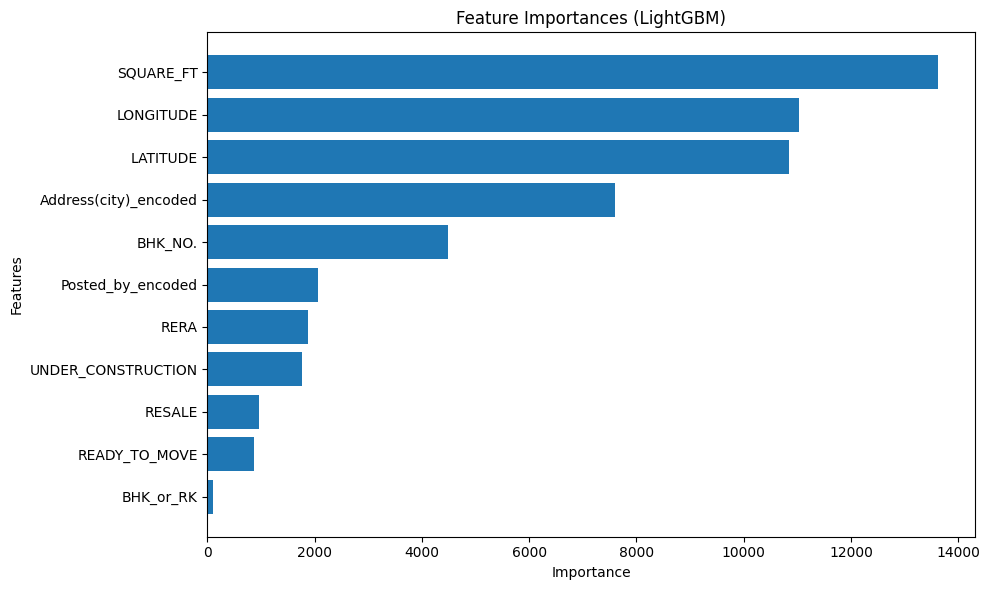

In [83]:

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
plt.title('Feature Importances (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


**`Residual Plot`**

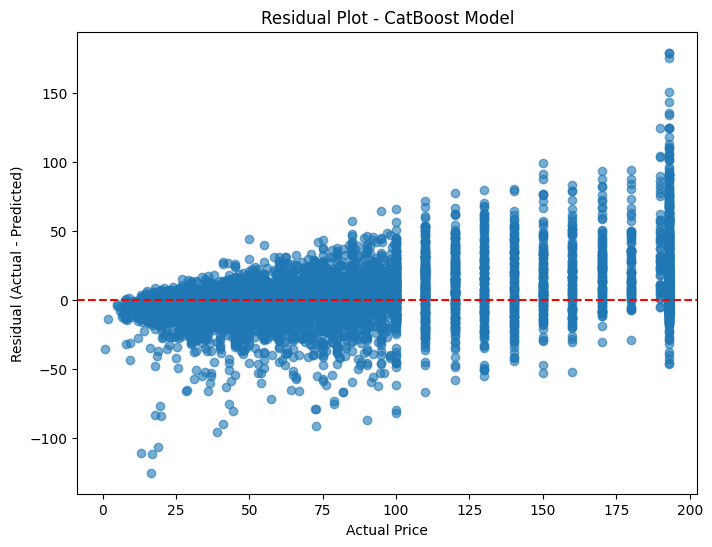

In [84]:
residuals = y_val_true_l - y_pred_lgb_l

plt.figure(figsize=(8,6))
plt.scatter(y_val_true_l, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot - CatBoost Model")
plt.show()


**`Actual vs Pridicted prices plot`**

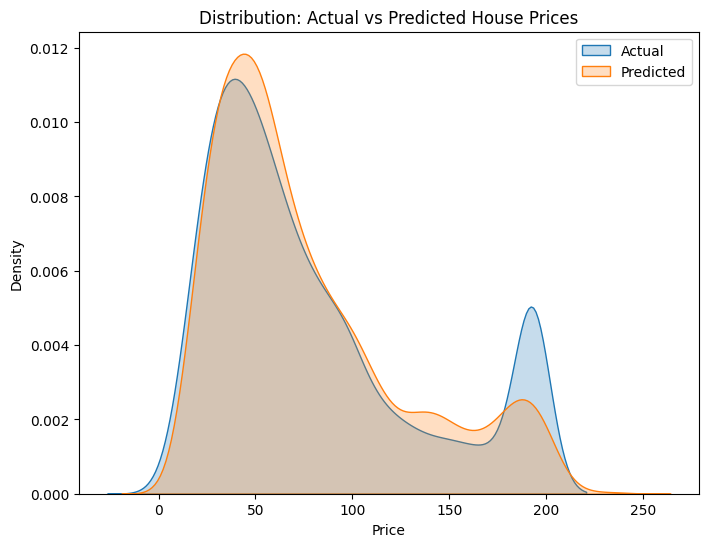

In [85]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_val_true_l, label="Actual", shade=True)
sns.kdeplot(y_pred_lgb_l, label="Predicted", shade=True)
plt.title("Distribution: Actual vs Predicted House Prices")
plt.xlabel("Price")
plt.legend()
plt.show()

In [96]:
# Save the model and encoders using pickle instead of joblib
import pickle

# Save the LightGBM model
print("Saving the model...")
with open('model_lgb.pkl', 'wb') as f:
    pickle.dump(lgbm_B, f, protocol=4)  # Use protocol 4 for better compatibility

# Save the encoders
print("Saving the encoders...")
with open('location_encoder.pkl', 'wb') as f:
    pickle.dump(le, f, protocol=4)

with open('posted_by_encoder.pkl', 'wb') as f:
    pickle.dump(le2, f, protocol=4)

print("All files saved successfully!")

Saving the model...
Saving the encoders...
All files saved successfully!
Saving the encoders...
All files saved successfully!
